<a href="https://colab.research.google.com/github/CrushedKatana/2341720205_ML_2025/blob/main/JS13_Charellino_Kalingga_S_2341720205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1 – Perceptron on the Iris Dataset

## Phase 1 – Import supporting libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap


## Phase 2 – Load and inspect the Iris data

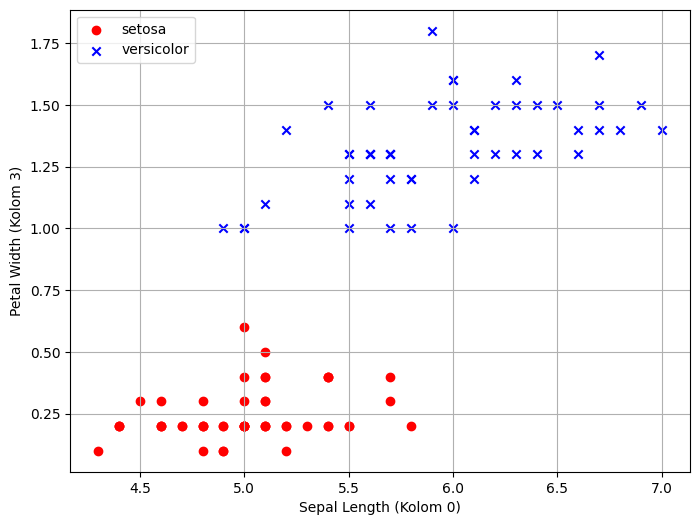

In [ ]:
df = pd.read_csv('/content/iris.csv', header=None, skiprows=1)

for col in [0, 1, 2, 3]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

setosa = df[df[4] == 'setosa']
versicolor = df[df[4] == 'versicolor']

a, b = 0, 3
plt.figure(figsize=(8, 6))
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Sepal Length (Column 0)')
plt.ylabel('Petal Width (Column 3)')
plt.legend(loc='upper left')
plt.grid()
plt.show()


## Phase 3 – Creating a Perceptron class

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


## Phase 4 – Select data and encode labels

In [ ]:
y = df.iloc[0:100, 4].values

y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 3]].values


## Phase 5 – Fit the Perceptron model


In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

print(f"Final weights (w0, w1, w2): {ppn.w_}")
print(f"Errors per epoch: {ppn.errors_}")


Bobot Akhir (w0, w1, w2): [0. 0. 0.]
Error per Epoch: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Phase 6 – Visualize errors per epoch


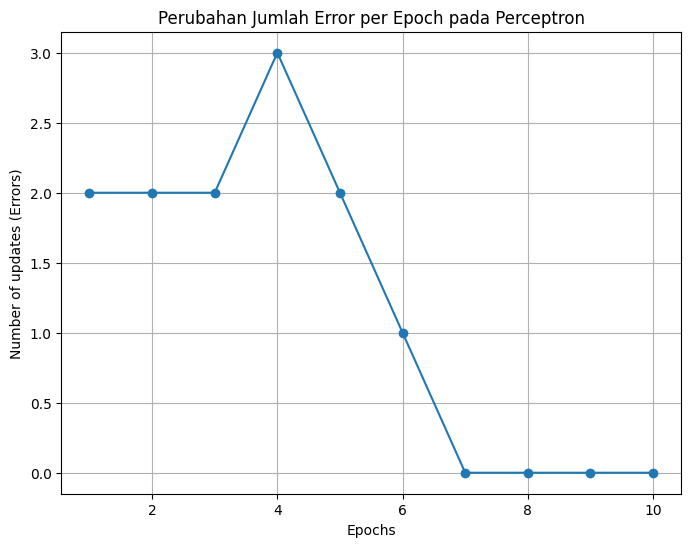

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates (errors)')
plt.title('Perceptron training errors per epoch')
plt.grid()
plt.savefig('perceptron_errors_vs_epochs.png')


## Phase 7 – Plot the decision boundary


/tmp/ipython-input-2617003316.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


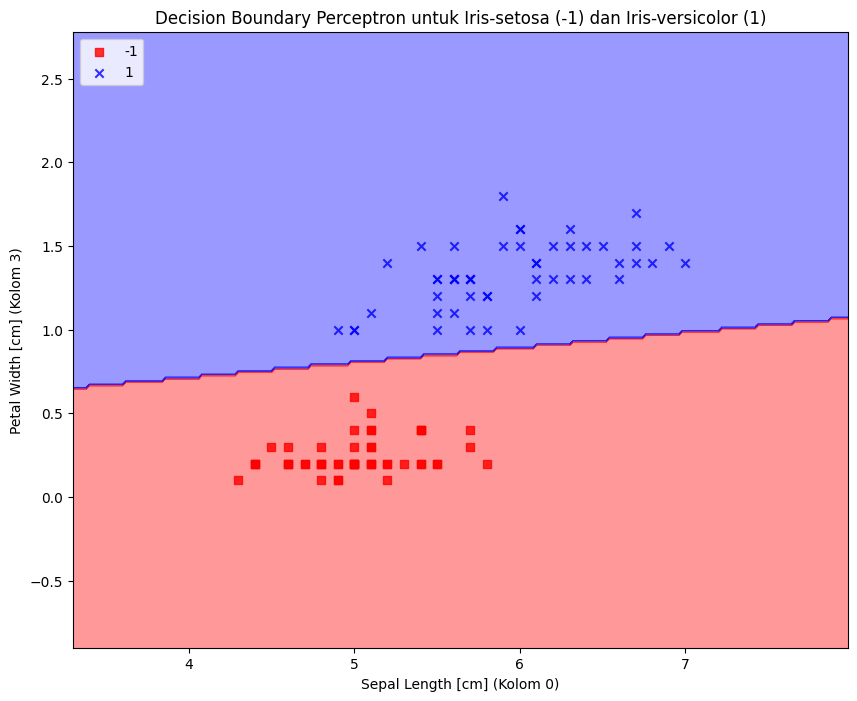

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for i, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=cmap(i),
            marker=markers[i],
            label=cl,
        )


plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm] (Column 0)')
plt.ylabel('Petal Width [cm] (Column 3)')
plt.title('Perceptron decision boundary: Iris-setosa (-1) vs Iris-versicolor (1)')
plt.legend(loc='upper left')
plt.savefig('perceptron_decision_boundary.png')


# Module 2 – Modelling XOR with a Simple MLP


## Phase 1 – Import the MLP library


In [ ]:
from sklearn.neural_network import MLPClassifier

## Phase 2 – Define XOR data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

## Phase 3 – Train the MLP on XOR


In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

## Phase 4 – Evaluate predictions


In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Module 3 – Customer churn prediction with ANN

## Data preparation pipeline

### Phase 1 – Import core libraries


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Phase 2 – Load the churn dataset

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

### Inspecting the feature matrix (X)

In [ ]:
print(X)


[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


### Phase 3 – Encode categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)


[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


### Phase 4 – One‑hot encode the Geography column

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Verifying the transformed features

In [ ]:
print(X)


[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Phase 5 – Train/test split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Phase 6 – Standardize numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the ANN classifier

### Phase 7 – Initialize the Sequential model

In [ ]:
ann = tf.keras.models.Sequential()

### Phase 8 – Add the first hidden layer


In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Phase 9 – Add a second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Phase 10 – Define the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Phase 11 – Compile the network

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Phase 12 – Fit the model on the training data

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

## Making predictions on a single customer


### Phase 13 – Prepare the new data point and run the prediction


In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
[[False]]


## Evaluating predictions on the test set

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Accuracy and confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1185  410]
 [ 331   74]]


0.6295

# Module 4 – Day and night image classification with ANN

## Dataset used in this module

## Phase 1 – Import required libraries

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models

## Phase 2 – Load the image dataset

In [ ]:
# Load images and labels from a directory structure
def load_dataset(img_dir):
    p = Path(img_dir)
    img_list = []
    for folder in p.glob('*'):
        label = folder.name
        for file in folder.glob('*.jpg'):
            img = cv2.imread(str(file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_list.append((img, label))
    return img_list

train_dir = "/content/drive/MyDrive/dataset/images/training"
test_dir  = "/content/drive/MyDrive/dataset/images/test"

train_img = load_dataset(train_dir)
test_img  = load_dataset(test_dir)

## Phase 3 – Resize images and encode labels

In [ ]:
# Preprocess images: resize and encode labels
def resize_image(img, size=(256,256)):
    return cv2.resize(img, size)

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    X = []
    y = []
    for img, label in img_list:
        img_std = resize_image(img)
        X.append(img_std)
        y.append(label_encoder(label))
    return X, y

X_train_img, y_train = preprocess(train_img)
X_test_img,  y_test  = preprocess(test_img)

## Phase 4 – Extract HOG features

In [ ]:
# Extract HOG features
def extract_hog(X_imgs):
    feats = []
    for img in X_imgs:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        hog_feat = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8,8),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

X_train_feat = extract_hog(X_train_img)
X_test_feat  = extract_hog(X_test_img)

## Phase 5 – Standardize HOG features


In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled  = scaler.transform(X_test_feat)

## Phase 6 – Create training and validation splits


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42
)

# Convert label ke numpy array
y_train = np.array(y_train)
y_val   = np.array(y_val)
y_test  = np.array(y_test)

## Phase 7 – Define the ANN architecture

In [ ]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │     4,428,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,436,737 (16.92 MB)

 Trainable params: 4,436,737 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

## Phase 8 – Train the network


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.7031 - loss: 0.7911 - val_accuracy: 0.9167 - val_loss: 1.0226
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9583 - val_loss: 0.3362
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.9883 - loss: 0.0381 - val_accuracy: 0.9583 - val_loss: 0.4859
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9928 - loss: 0.0081 - val_accuracy: 0.9792 - val_loss: 0.4324
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 1.0000 - loss: 8.1575e-07 - val_accuracy: 0.9792 - val_loss: 0.4286
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 1.0000 - loss: 9.5197e-07 - val_accuracy: 0.9792 - val_loss: 0.4259
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 1.0000 - loss: 8.2843e-07 - val_accuracy: 0.9792 - val_loss: 0.4242
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 1.0000 - loss: 7.4085e-07 - val_accuracy: 0.

## Phase 9 – Evaluate on the test set


In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print("Akurasi Test:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8738 - loss: 1.9574
Akurasi Test: 0.8687499761581421


## Phase 10 – Generate a performance report

In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        80
           1       0.86      0.89      0.87        80

    accuracy                           0.87       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.87      0.87      0.87       160

[[68 12]
 [ 9 71]]


## Phase 11 – Visualize the training process

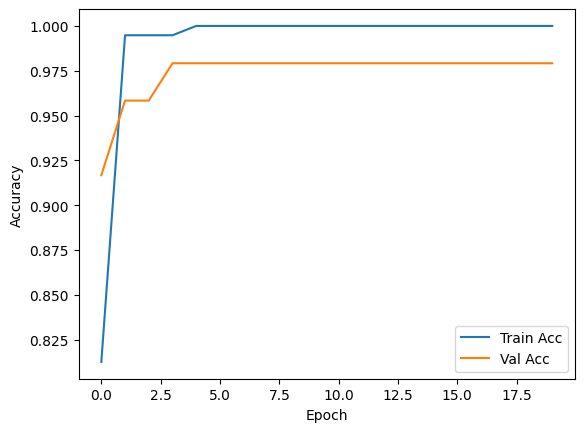

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Phase 12 – Save the trained model

In [ ]:
model.save('day_night_classifier_model.h5')

# LAB Assignment – MNIST digit classification project

## Phase 1 – Preparation and importing libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

## Phase 2 – Load and explore the MNIST data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Bentuk data latih: (60000, 28, 28)
Bentuk label latih: (60000,)
Bentuk data uji: (10000, 28, 28)
Bentuk label uji: (10000,)


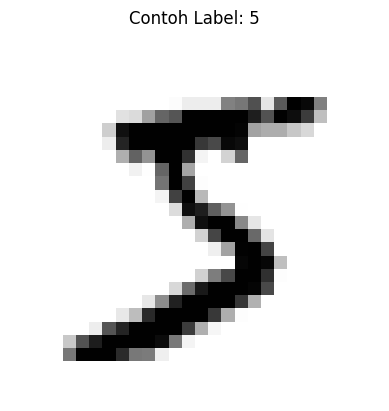

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

print(f"Bentuk data latih: {X_train_full.shape}")
print(f"Bentuk label latih: {y_train_full.shape}")
print(f"Bentuk data uji: {X_test.shape}")
print(f"Bentuk label uji: {y_test.shape}")

plt.imshow(X_train_full[0], cmap="binary")
plt.title(f"Contoh Label: {y_train_full[0]}")
plt.axis('off')
plt.show()

## Phase 3 – Data preprocessing

### 3A. Normalization

In [ ]:
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### 3B. One‑hot label encoding

In [ ]:
num_classes = 10
y_train_encoded = to_categorical(y_train_full, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

### 3C. Split training and validation data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_encoded,
    test_size=5000,
    random_state=42
)

## Phase 4 – Create the ANN model architecture

In [ ]:
input_shape = (28, 28)

model = Sequential([

    Flatten(input_shape=input_shape),

    Dense(256, activation='relu'),

    Dense(128, activation='relu'),

    Dense(num_classes, activation='softmax')
])

# Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Model Training

In [ ]:
# model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8916 - loss: 0.3653 - val_accuracy: 0.9668 - val_loss: 0.1111
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9735 - loss: 0.0880 - val_accuracy: 0.9730 - val_loss: 0.0835
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9825 - loss: 0.0545 - val_accuracy: 0.9744 - val_loss: 0.0871
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9860 - loss: 0.0414 - val_accuracy: 0.9722 - val_loss: 0.0944
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9904 - loss: 0.0307 - val_accuracy: 0.9788 - val_loss: 0.0684
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9922 - loss: 0.0240 - val_accuracy: 0.9798 - val_loss: 0.0781
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9925 - loss: 0.0216 - val_accuracy: 0.9770 - val_loss: 0.0817
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9942 - loss: 0

## Step 6: Model Evaluation


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)
print(f"\nAkurasi Test Akhir: {test_acc:.4f}")

y_pred_encoded = model.predict(X_test)

y_pred = np.argmax(y_pred_encoded, axis=1)

313/313 - 1s - 3ms/step - accuracy: 0.9800 - loss: 0.0863

Akurasi Test Akhir: 0.9800
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Confusion Matrix:
[[ 972    1    1    0    0    0    2    1    2    1]
 [   0 1125    3    0    0    1    2    1    3    0]
 [   3    0 1014    2    1    0    2    4    6    0]
 [   1    1    3  984    0    6    0   

## Step 7: Visualize the Training Process

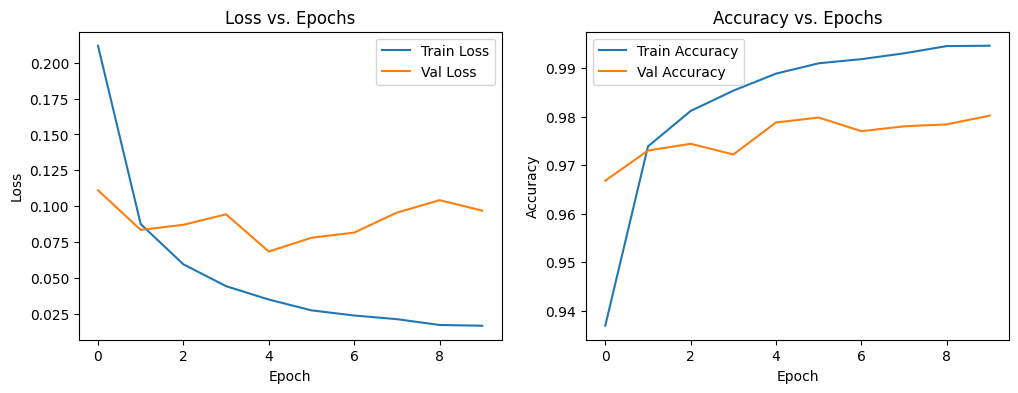

In [ ]:
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()